In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 몬테카를로 방법

## 기본

### 원 넓이 구하기

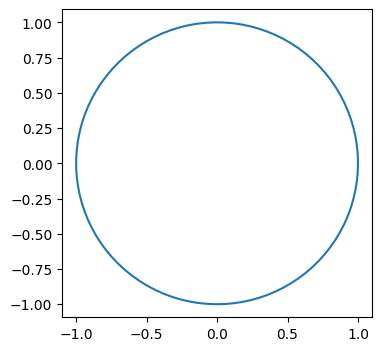

In [ ]:
theta = np.linspace(0, 2 * np.pi, 100)

plt.figure(figsize = (4,4))
plt.plot(np.cos(theta), np.sin(theta))
plt.xlim((-1,1))
plt.ylim((-1,1))
plt.axis('equal')
plt.show()

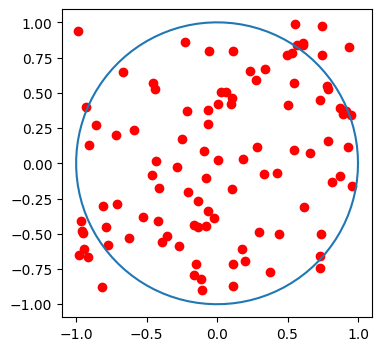

In [ ]:
N = 100
x = np.random.rand(N)*2 -1.0
y = np.random.rand(N)*2 -1.0

theta = np.linspace(0, 2 * np.pi, 100)

plt.figure(figsize = (4,4))
plt.plot(np.cos(theta), np.sin(theta))
plt.scatter(x, y, color = 'red')
plt.xlim((-1,1))
plt.ylim((-1,1))
plt.axis('equal')
plt.show()

In [ ]:
N = 100
x = np.random.rand(N)*2 -1.0
y = np.random.rand(N)*2 -1.0
ratio = np.mean(x**2 + y**2 < 1)

print(ratio*4)

3.28


In [ ]:
for N in 10**np.arange(1,7):
  x = np.random.rand(N)*2 -1.0
  y = np.random.rand(N)*2 -1.0
  ratio = np.mean(x**2 + y**2 < 1)
  print(N, ratio*4)

10 3.6
100 3.12
1000 3.128
10000 3.1368
100000 3.146
1000000 3.141336


### 적분 1

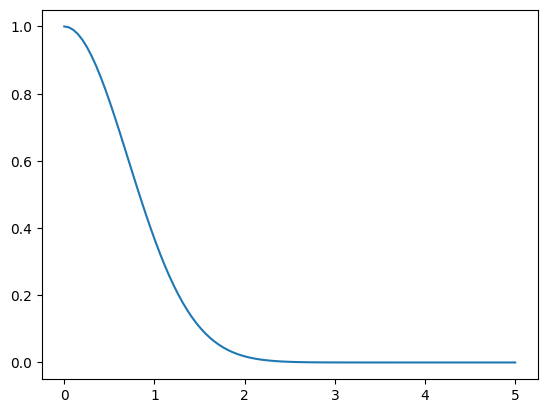

In [ ]:
xarr = np.linspace(0, 5, 100)
yarr = np.exp(-xarr**2)

plt.plot(xarr, yarr)
plt.show()

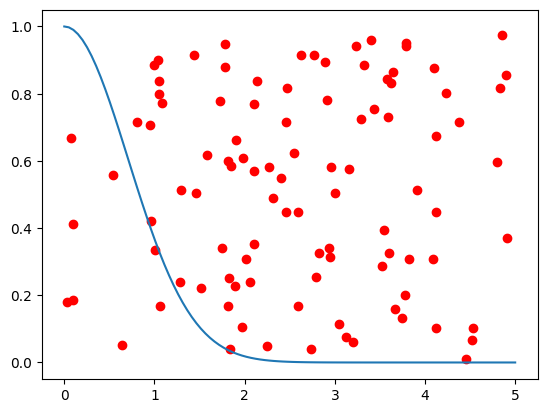

In [ ]:
N = 100
x = np.random.rand(N)*5
y = np.random.rand(N)*1

xarr = np.linspace(0, 5, 100)
yarr = np.exp(-xarr**2)

plt.plot(xarr, yarr)
plt.scatter(x, y, color = 'red')
plt.show()

In [ ]:
N = 100
x = np.random.rand(N)*5
y = np.random.rand(N)*1
ratio = np.mean(y < np.exp(-x**2))

print(ratio*5)

0.55


In [ ]:
for N in 10**np.arange(1,7):
  x = np.random.rand(N)*5
  y = np.random.rand(N)*1
  ratio = np.mean(y < np.exp(-x**2))
  print(N, ratio*5)

10 1.0
100 0.8999999999999999
1000 0.8450000000000001
10000 0.8615
100000 0.8895500000000001
1000000 0.888005


### 적분 2

다른 방법도 존재한다. $x\in[0,5]$를 만족하는 $x$를 $N$개 무작위로 선택하면, 인접한 두 $x$ 사이의 간격은 $Δx≈5/N$이 된다. 이를 이용하면 적분 $∫^5_0 e^{-x^2}dx$의 근사값은 $\frac{5}{N}\sum^N_{i=1}e^{-x_i^2}$로 어림할 수 있다.

In [ ]:
for N in 10**np.arange(1,7):
  x = np.random.rand(N)*5
  y = np.exp(-x**2)
  print(N, np.sum(y)*5.0/N)

10 0.5153752902172846
100 0.8689024944761427
1000 0.8933021600895984
10000 0.8919880704193158
100000 0.8863707451132691
1000000 0.8863425578719321


### 적분 3



몬테카를로 방법에서 널리 쓰이는 중요성 샘플링(importance sampliing)도 존재한다. 함수가 특정 영역에서만 큰 값을 가져 적분값에 더 중요하게 기여하는 영역에서는 좀 더 촘촘하게(dense) 샘플링을 하고, 이 영역 밖에서는 성기게(sparse) 샘플링을 하는 것이 보다 정확한 수치 적분을 얻기에 유리하다는 것을 알 수 있다.

이처럼 영역의 중요성에 따라 샘플링을 달리하는 것이 중요성 샘플링의 기본 아이디어!

## 물리학적 응용

### 이징 모델

0.1 1.0
0.2 1.0
0.30000000000000004 0.9942773999999317
0.4 0.981771399999982
0.5 0.9588204000000111
0.6 0.8980844000000164
0.7000000000000001 0.8346255999999844
0.8 0.7391417999999959
0.9 0.522938999999992
1.0 0.29181019999999425
1.1 0.037635599999999506
1.2000000000000002 0.021444600000000594
1.3000000000000003 0.03643580000000038
1.4000000000000001 0.03682720000000005
1.5000000000000002 0.020831400000000527
1.6 0.03880519999999895
1.7000000000000002 0.033152599999999435
1.8000000000000003 0.038485999999999375
1.9000000000000001 0.03583639999999993


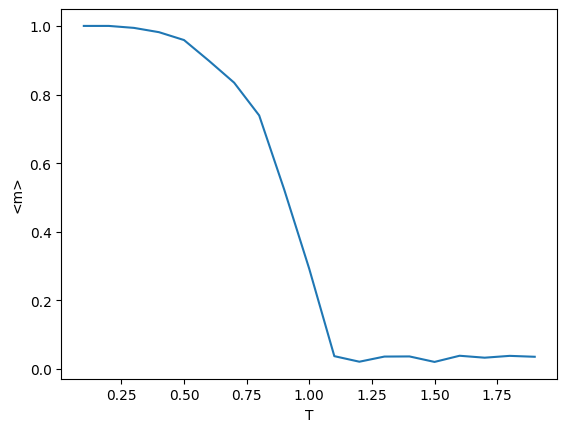

In [ ]:
N = 1000          # 스핀 개수
MCstep = 10000    # 전체 몬테카를로 스텝

def calE(A,S):              # 이징 모형의 해밀토니안(에너지)
  return (-0.5*S@A@S.T)     # @연산은 행렬곱 연산을 뜻한다.

def MCrun(A, S, N, T, E):
  Snew = np.copy(S)
  k = np.random.randint(N)  # 업데이트 할 스핀 하나를 무작위로 뽑는다
  Snew[k] *= -1
  Enew = calE(A, Snew)
  DeltaE = Enew - E
  if (DeltaE <= 0.0):
    S[k] *= -1
    E = Enew
  elif (np.random.rand() < np.exp(-DeltaE/T)):
    S[k] *= -1
    E = Enew
  return E

A = np.ones([N,N])/N                 # 모두 다 연결되어 있는 경우의 인접 행렬
S = 2*(np.random.rand(N) > 0.5) - 1  # 스핀 벡터의 초기화
xarr = []
yarr = []

E = calE(A,S)

for T in np.arange(0.1, 2.0, 0.1):    # 계산하는 온도 T에 대한 for loop
  # 평형으로 가는 과정
  for n in range(MCstep):             # 주어진 T에서 몬테카를로 계산
    E = MCrun(A,S,N,T,E)

  # 평형화 된 이후 질서도 측정
  m = 0.0
  for n in range(MCstep):             # 주어진 T에서 몬테카를로 계산
    E = MCrun(A,S,N,T,E)
    m += np.abs(np.mean(S))

  print(T, m/MCstep)
  xarr.append(T)
  yarr.append(m/MCstep)

plt.plot(xarr, yarr)
plt.xlabel('T')
plt.ylabel('<m>')
plt.show()

### 톰슨 문제

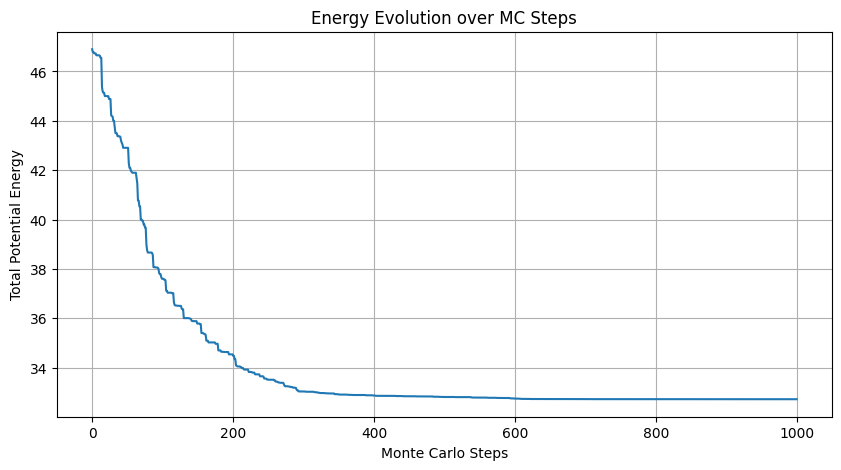

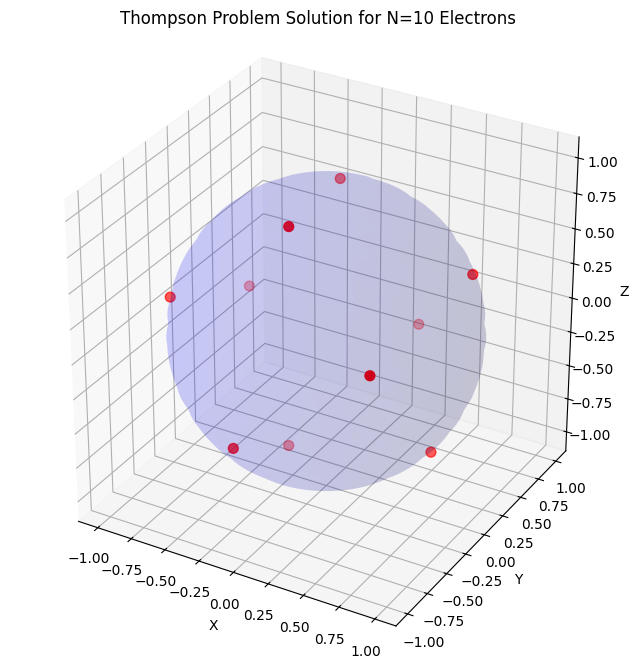

In [ ]:
N = 10                   # 전자 개수
MCstep = 1000          # 전체 몬테카를로 스텝
MAX_DISPLACEMENT = 0.1  # 한 스텝에서 전자가 움직일 수 있는 최대 거리

def calPE(positions):
    """
    주어진 전자 위치 배열에 대한 총 위치 에너지를 계산합니다.
    쿨롱 상호작용 에너지는 1/r 에 비례합니다.
    """
    energy = 0.0
    for i in range(N):
        for j in range(i + 1, N):
            r = np.linalg.norm(positions[i] - positions[j])
            energy += 1.0 / r
    return energy

def NormalPosit(positions):
    """
    전자 위치를 단위 구 표면으로 정규화합니다.
    """
    return positions / np.linalg.norm(positions, axis=1)[:, np.newaxis]

# 전자를 무작위로 단위 구 표면에 초기 배치
positions = np.random.randn(N, 3)
positions = NormalPosit(positions)
current_energy = calPE(positions)

energy_history = [] # 에너지 변화 기록

for step in range(MCstep):
    # 무작위로 하나의 전자를 선택
    electron_idx = np.random.randint(N)

    # 현재 전자의 위치 저장
    original_position = np.copy(positions[electron_idx])

    # 선택된 전자를 무작위 방향으로 작은 양만큼 이동
    # 단위 구 표면 위에서 움직이도록 조작
    displacement_vector = (np.random.rand(3) - 0.5) * 2 * MAX_DISPLACEMENT
    new_position = original_position + displacement_vector

    # 새로운 위치를 단위 구 표면으로 정규화
    new_position = new_position / np.linalg.norm(new_position)

    # 새로운 위치로 가정했을 때의 에너지 계산
    temp_positions = np.copy(positions)
    temp_positions[electron_idx] = new_position
    new_energy = calPE(temp_positions)

    delta_energy = new_energy - current_energy

    # 메트로폴리스 기준 적용
    if delta_energy < 0:
      positions[electron_idx] = new_position
      current_energy = new_energy

    energy_history.append(current_energy)


# 에너지 변화 그래프
plt.figure(figsize=(10, 5))
plt.plot(energy_history)
plt.title('Energy Evolution over MC Steps')
plt.xlabel('Monte Carlo Steps')
plt.ylabel('Total Potential Energy')
plt.grid(True)
plt.show()

# 최종 전자 배치 3D 시각화
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# 구의 표면 그리기
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x, y, z, color='b', alpha=0.1, rstride=5, cstride=5)

# 전자 위치 표시
ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2], color='red', s=50)
ax.set_title(f'Thompson Problem Solution for N={N} Electrons')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_aspect('equal', adjustable='box') # 종횡비 유지
plt.show()